# Συσχέτιση

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

## Συντελεστής Συσχέτισης

* Θέλουμε να διερευνήσουμε τη συσχέτιση (correlation) δύο μεταβλητών όταν πιστεύουμε ότι υπάρχει κάποιου είδους σχέση μεταξύ τους.

* Ένας συνήθης τρόπος μέτρησης της συσχέτισης είναι ο συντελεστής συσχέτισης Pearson (Pearson correlation coefficient).

* Ο συντελεστής αυτός, ο οποίος συμβολίζεται με $r$, είναι μια τιμή από το $-1$ στο $+1$.

* Η τιμή $+1$ δείχνει ότι οι μεταβλητές έχουν μια τέλεια θετική γραμμική σχέση, η τιμή $-1$ δείχνει μια τέλεια αρνητική γραμμική σχέση, ενώ η τιμή $0$ δείχνει ότι δεν υπάρχει γραμμική συσχέτιση.

* Για τη μελέτη της συσχέτισης θα χρησιμοποιήσουμε τη βιβλιοθήκη [SciPy](https://www.scipy.org/).

In [6]:
import scipy.stats as stats

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style()

* Έστω ότι έχουμε ένα σύνολο παρατηρήσεων δύο μεταβλητών `x` και `y`.

* Τα δεδομένα μας είναι *συνθετικά*, δηλαδή τα κατασκευάζουμε εμείς οι ίδιοι ώστε να είναι της μορφής:

$$y = 0{,}8 x + 0{,}36 \epsilon $$

In [7]:
np.random.seed(42)
r = 0.8
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
df_1 = pd.DataFrame({'x': x, 'y': y})

In [8]:
df_1

,x,y
0,0.496714,-0.451851
1,-0.138264,-0.362999
2,0.647689,0.312522
3,1.523030,0.737058
4,-0.234153,-0.284094
...,...,...
95,-1.463515,-0.939622
96,0.296120,-0.293418
97,0.261055,0.301079
98,0.005113,0.039016


* Αν τα αποτυπώσουμε διαγραμματικά θα έχουν την [ακόλουθη μορφή](https://upload.wikimedia.org/wikipedia/commons/6/67/Spearman_fig3.svg):

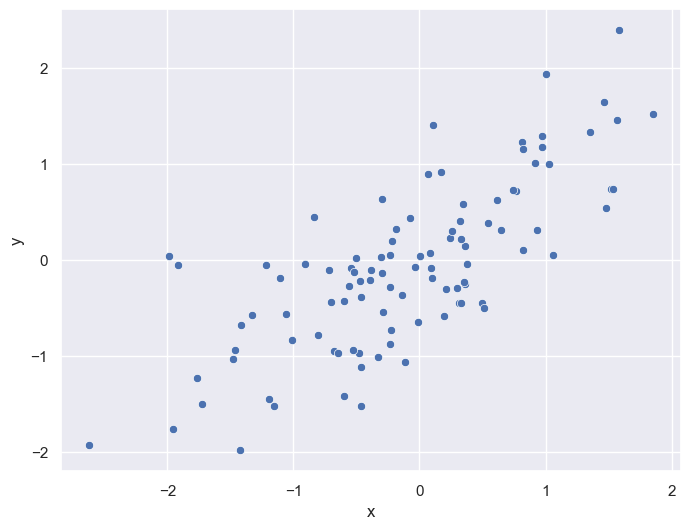

In [9]:
sns.set(rc={"figure.figsize":(8, 6)})
_ = sns.scatterplot(x='x', y='y', data=df_1)

* Για τον υπολογισμό του συντελεστή Pearson χρησιμοποιούμε τη συνάρτηση `pearsonr()` από τη βιβλιοθήκη `scipy.stats.stats`.

* Η συνάρτηση επιστρέφει δύο τιμές: τον συντελεστή και την τιμή σημαντικότητάς του (p-value).

In [19]:
# Calculate Pearson correlation
correlation, p_value = stats.pearsonr(df_1.x, df_1.y)

# Print the results
print(f"Pearson correlation coefficient: {correlation:.6f}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.752900
P-value: 1.6598002643729898e-19


* Ο συντελεστής Pearson μειώνεται όσο ξεφεύγουμε από τη γραμμική σχέση.

* Ας δούμε το παρακάτω παράδειγμα συνθετικών δεδομένων:

$$y = 0{,}6 x + 0{,}64  \epsilon $$

In [13]:
np.random.seed(42)
r = 0.6
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
df_2 = pd.DataFrame({'x': x, 'y': y})

In [14]:
df_2

,x,y
0,0.496714,-0.834268
1,-0.138264,-0.419475
2,0.647689,0.114442
3,1.523030,0.271996
4,-0.234153,-0.269521
...,...,...
95,-1.463515,-0.569855
96,0.296120,-0.529414
97,0.261055,0.279613
98,0.005113,0.049635


* Διαγραμματικά εμφανίζονται ως εξής:

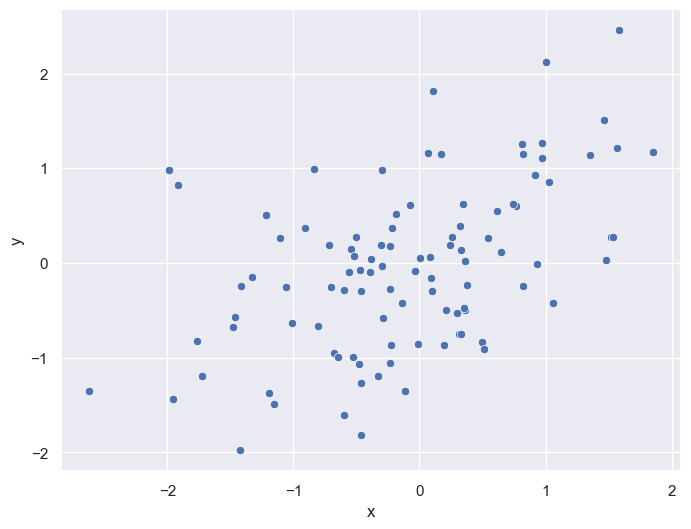

In [15]:
_ = sns.scatterplot(x='x', y='y', data=df_2)

* Με αυτά τα δεδομένα παίρνουμε:

In [ ]:
# Calculate Pearson correlation
correlation, p_value = stats.pearsonr(df_2.x, df_2.y)

# Print the results
print(f"Pearson correlation coefficient: {correlation:.6f}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.5038
P-value: 9.120853831670804e-08


* Ο συντελεστής Pearson χρειάζεται προσοχή όταν τα δεδομένα μας έχουν έκτοπες τιμές (outliers), όπως [τα παρακάτω](https://upload.wikimedia.org/wikipedia/commons/6/67/Spearman_fig3.svg):

In [20]:
np.random.seed(42)
r = 0.8
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
ii = np.argsort(-x)
x[ii[0:5]] *= 5
df_3 = pd.DataFrame({'x': x, 'y': y})

In [21]:
df_3

,x,y
0,0.496714,-0.451851
1,-0.138264,-0.362999
2,0.647689,0.312522
3,7.615149,0.737058
4,-0.234153,-0.284094
...,...,...
95,-1.463515,-0.939622
96,0.296120,-0.293418
97,0.261055,0.301079
98,0.005113,0.039016


* Πράγματι, μπορούμε να δούμε τις έκτοπες τιμές στα δεξιά:

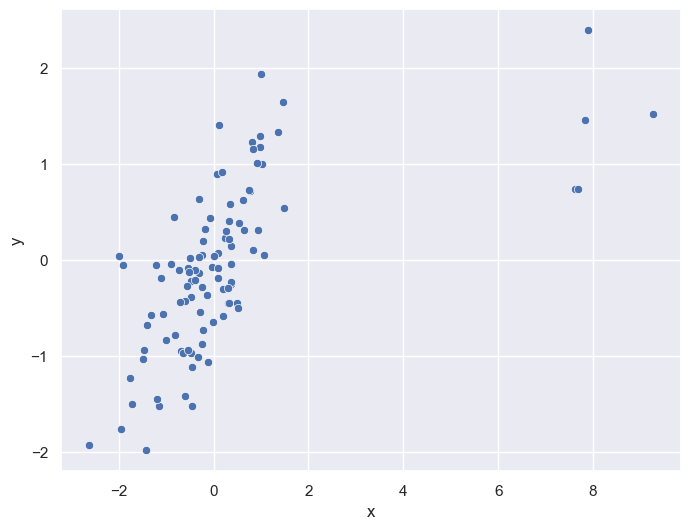

In [22]:
_ = sns.scatterplot(x='x', y='y', data=df_3)

* Τότε παίρνουμε:

In [23]:
# Calculate Pearson correlation
correlation, p_value = stats.pearsonr(df_3.x, df_3.y)

# Print the results
print(f"Pearson correlation coefficient: {correlation:.6f}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: 0.620089
P-value: 5.996001353052185e-12


* Να θυμάστε ότι ο συντελεστής Pearson μετράει μια *γραμμική* συσχέτιση στα δεδομένα.

* Αυτό σημαίνει ότι τα δεδομένα μπορεί μεν να έχουν μια ξεκάθαρη σχέση, την οποία παρόλα αυτά δεν μπορεί να την εντοπίσει ο συντελεστής Pearson, όπως μπορείτε να δείτε στην [παρακάτω εικόνα](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#/media/File:Correlation_examples2.svg).

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg" width="800" />

* Αν η συσχέτιση δεν είναι γραμμική, αλλά είναι εν τούτοις αύξουσα ή φθίνουσα, τότε μπορεί να είναι καταληλότερος ένας άλλος συντελεστής, ο συντελεστής συσχέτισης του Spearman.

* Ο συντελεστής αυτός συμβολίζεται με $\rho$ και μετρά πόσο καλά δύο μεταβλητές έχουν μια αύξουσα ή φθίνουσα (αλλά όχι απαραίτητα γραμμική) σχέση.

* Για τον υπολογισμό του συντελεστή Pearson χρησιμοποιούμε τη συνάρτηση `spearman()` από τη βιβλιοθήκη `scipy.stats.stats`, η οποία πάλι επιστρέφει τον συντελεστή και την τιμή σημαντικότητας.

* Έστω ότι τα δεδομένα μας είναι όπως [παρακάτω](https://commons.wikimedia.org/wiki/File:Spearman_fig1.svg):

$$ y = \operatorname{sgn}\left(\ln\frac{x}{1-x}\right) \left|\,\ln\frac{x}{1-x}\,\right|^{1{,}4} $$

In [24]:
np.random.seed(42)
x = np.random.uniform(size=100)
y = np.log(x/(1-x))
y = np.sign(y)*(np.abs(y)**1.4)
df_4 = pd.DataFrame({'x': x, 'y': y})

In [25]:
df_4

,x,y
0,0.374540,-0.392567
1,0.950714,4.567958
2,0.731994,1.006674
3,0.598658,0.277140
4,0.156019,-2.081504
...,...,...
95,0.493796,-0.005658
96,0.522733,0.034883
97,0.427541,-0.178365
98,0.025419,-6.118256


* Μπορούμε να δούμε ότι τα δεδομένα έχουν μια γνησίως αύξουσα συσχέτιση, αλλά όχι γραμμική:

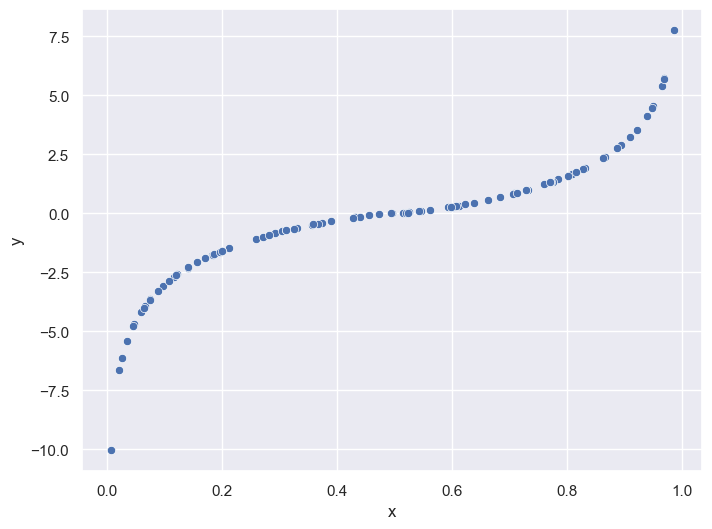

In [26]:
_ = sns.scatterplot(x='x', y='y', data=df_4)

* Για να δούμε τι μας δίνουν οι συντελεστές Pearson και Spearman:

In [28]:
# Calculate Pearson correlation
correlationP, p_valueP = stats.pearsonr(df_4.x, df_4.y)

# Print the results
print(f"Pearson correlation coefficient: {correlationP:.6f}")
print(f"P-value: {p_valueP}\n")

# Calculate Pearson correlation
correlationS, p_valueS = stats.spearmanr(df_4.x, df_4.y)

# Print the results
print(f"Spearman correlation coefficient: {correlationS:.6f}")
print(f"P-value: {p_valueS}")


Pearson correlation coefficient: 0.915429
P-value: 1.6129079055538265e-40

Spearman correlation coefficient: 1.000000
P-value: 0.0


* Ο συντελεστής Spearman μπορεί να είναι λιγότερο ευαίσθητος στις έκτοπες τιμές.

* Αν επιστρέψουμε στο σχετικό παράδειγμα:

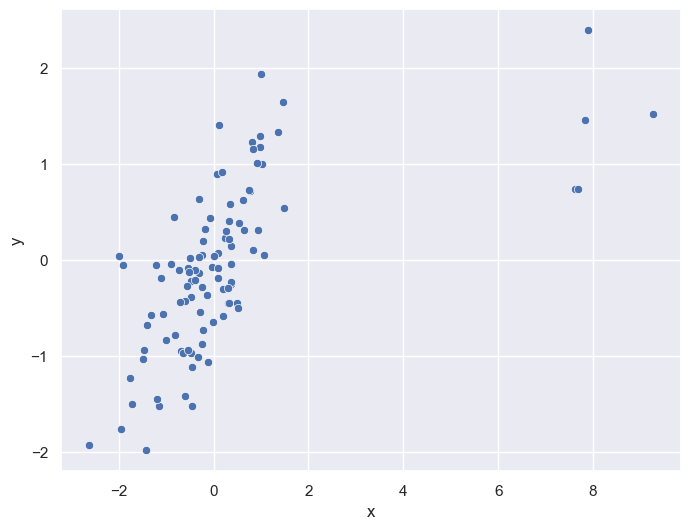

In [29]:
_ = sns.scatterplot(x='x', y='y', data=df_3)

* Βλέπουμε ότι:

In [30]:
# Calculate Pearson correlation
correlationP, p_valueP = stats.pearsonr(df_3.x, df_3.y)

# Print the results
print(f"Pearson correlation coefficient: {correlationP:.6f}")
print(f"P-value: {p_valueP}\n")

# Calculate Pearson correlation
correlationS, p_valueS = stats.spearmanr(df_3.x, df_3.y)

# Print the results
print(f"Spearman correlation coefficient: {correlationS:.6f}")
print(f"P-value: {p_valueS}")


Pearson correlation coefficient: 0.620089
P-value: 5.996001353052185e-12

Spearman correlation coefficient: 0.720120
P-value: 3.0751702980521144e-17


* Ας δούμε ένα άλλο [παράδειγμα δεδομένων](the_functional_art.csv), από [ανάρτηση](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html) του [Alberto Cairo](http://albertocairo.com/).


In [31]:
import pandas as pd

df_ac = pd.read_csv('the_functional_art.csv', header=None, names=['x', 'y'])
df_ac

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333
...,...,...
137,39.4872,25.3846
138,91.2821,41.5385
139,50.0000,95.7692
140,47.9487,95.0000


* Τα δεδομένα αυτά έχουν τις παρακάτω βασικές στατιστικές:

In [32]:
df_ac.describe()

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


* Δεν φαίνεται να υπάρχει συσχέτιση μεταξύ των `x` και `y`:

In [34]:
# Calculate Pearson correlation
correlationP, p_valueP = stats.pearsonr(df_ac.x, df_ac.y)

# Print the results
print(f"Pearson correlation coefficient: {correlationP:.6f}")
print(f"P-value: {p_valueP}\n")

# Calculate Pearson correlation
correlationS, p_valueS = stats.spearmanr(df_ac.x, df_ac.y)

# Print the results
print(f"Spearman correlation coefficient: {correlationS:.6f}")
print(f"P-value: {p_valueS}")


Pearson correlation coefficient: -0.064472
P-value: 0.4458965980247046

Spearman correlation coefficient: -0.065109
P-value: 0.44140461256177976


* Είναι όμως πράγματι έτσι;

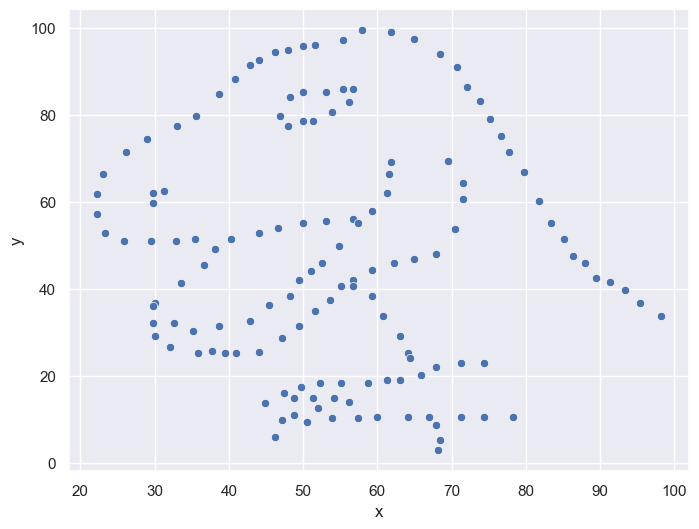

In [35]:
_ = sns.scatterplot(x='x', y='y', data=df_ac)

* Συμπέρασμα: μη βασίζεστε μόνο στις μετρικές.

* Οπτικοποιήστε τα δεδομένα σας όσο μπορείτε κατά την ανάλυσή σας.